<a href="https://colab.research.google.com/github/scottwmwork/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module3-dimensionality-reduction/High%20Dimensional%20Data%20Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

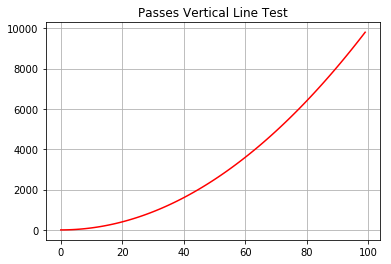

In [10]:
import matplotlib.pyplot as plt
import numpy as np

#Passes the vertical line test
x = np.array(range(100))
y = x ** 2

plt.plot(x,y,color = 'r')
plt.title('Passes Vertical Line Test')
plt.grid()
plt.show()

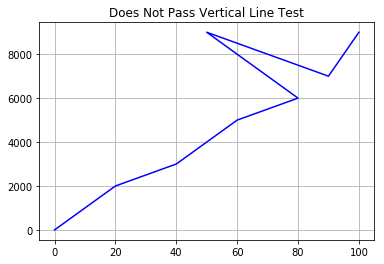

In [9]:
#Does not pass the vertical line test
x1 = [0,10,20,40,50,60,80,50,90,100]
y1 = [0,1000,2000,3000,4000,5000,6000,9000,7000,9000]
plt.plot(x1,y1,color = 'b')
plt.title('Does Not Pass Vertical Line Test')
plt.grid()
plt.show()

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

##Answer
Because the definition of a function is:

A function is a mapping from a set of inputs to a set of outputs where no two outputs are mapped to the same input.


# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

##Answer

Relation 2, Relation 3 since they pass the verical line test, or they don't have a repeating x-axis

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

##Answer:

1.) The domain input dimensionality is 3

2.) The codomain output dimensionality is 4

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

##Answer:

Yes this is possible as seen below:

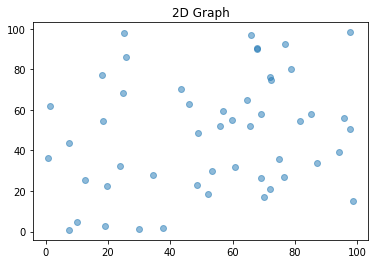

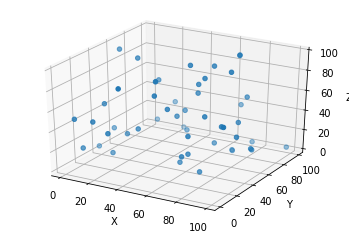

In [17]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# Create a list of 50 random floats and add them to a dataframe
N = 50
x = np.random.rand(N)*100

# Crete Dataframe
data = {"x": x}
df = pd.DataFrame(data)

# Create some y values to satisfy matplotlib
df['y'] = pd.Series(list(np.random.rand(N)*100))
df.head()

plt.scatter(df['x'], df['y'], alpha=0.5)
plt.title("2D Graph")
plt.show()

from mpl_toolkits.mplot3d import Axes3D

# Add Z dimension to dataframe
df['z'] = pd.Series(list(np.random.rand(N)*100))

threedee = plt.figure().gca(projection='3d')
threedee.scatter(df['x'], df['y'], df['z'])
threedee.set_xlabel('X')
threedee.set_ylabel('Y')
threedee.set_zlabel('Z')
plt.show()

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

In [28]:
#4.1 Plug the corresponding unit vectors into each function

def p(matrix = [1,0]):
  output_matrix = [(matrix[0]*1 + matrix[1]*3), (matrix[1]*2 - matrix[0]*1)]
  return output_matrix

def q(matrix = [1,0,0]):
  output_matrix = [(matrix[0]*4 + matrix[1] + matrix[2]*2),(matrix[1]*2 - matrix[0] + matrix[2]*3),(matrix[0]*5 - matrix[2]*2 + matrix[1])]
  return output_matrix
  
print("Function p output:",p([1,0]))
print("Function q output:",q([1,0,0]))

Function p output: [1, -1]
Function q output: [4, -1, 5]


## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [51]:
#Define matrix p and q
p_matrix = np.array([[1,3],
                    [-1,2]])

q_matrix = np.array([[4,1,2],
                     [-1,2,3],
                     [5,1,-2]])


mul_result_p = np.matmul(p_matrix,[1,0])
func_result_p = p([1,0])

print("Multiplying Result p:" , mul_result_p)
print("Defind Function Result p:", func_result_p)

mul_result_q = np.matmul(q_matrix,[1,0,0])
func_result_q = q([1,0,0])

print("\n") #seperation for print
print("Multiplying Result q:" , mul_result_q)
print("Defind Function Result q:", func_result_q)
print("\n They are the same! #verified")


Multiplying Result p: [ 1 -1]
Defind Function Result p: [1, -1]


Multiplying Result q: [ 4 -1  5]
Defind Function Result q: [4, -1, 5]

 They are the same! #verified


# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

#Answer:

Eigenvalues/Eigenvectors are simply vectors or values that after a transformation maintain their original direction. -λ

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

##Answer:

Combinatorics, Sampling, Optimization, Machine learning, Distance functions, etc.

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

##Answer:

Always make sure that you have 5 times the number of observations as you have parameters in your model

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [0]:
import pandas as pd
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')

In [42]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [40]:
#Based off the data above, we would want to be able to predict species, so this is our y matrix 

from numpy import array
from numpy import mean
from numpy import std
from numpy import cov
from numpy.linalg import eig

#define matrix from dataframe
X = array([[df.sepal_length],[df.sepal_width],[df.petal_length],[df.petal_width]])
# print("Data:", X)

#calculate the mean of each column
means = mean(x.T, axis = 1)
# print("\n Means: \n", means)

#center columns by subtracting column means
centered_data = X - means #ValueError: operands could not be broadcast together with shapes (4,1,150) (150,4) 
# print("\n Centered Data: \n", centered_data)

#calculate the standard deviaiton of each column
std_devs = std(X.T, axis = 1)

#complete the standardization by dividing by std_dev
Z = centered_data /std_devs
# print("\n Standardized Data: \n", Z)

#calculate the covariance matrix of centered matrix
covariance_matrix = cov(Z.T)
print("\n Covariance Matrix: \n", covariance_matrix)

values, vectors = eig(covariance_matrix)

print("\n Eigenvectors: \n", vectors)
print("\n Eigenvalues: \n", values)
# project data
P = vectors.T.dot(Z.T)
print("\n Projected Data: \n", P.T)

ValueError: ignored

In [43]:
#trying with a library

# Principal Component Analysis
from numpy import array
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# define a matrix
X = array([[df.sepal_length],[df.sepal_width],[df.petal_length],[df.petal_width]])
print("Data: \n", X)
# Standardize the Data
# Instantiate a Standard Scaler object
scaler = StandardScaler()
# Use the object to fit_transform our data
Z = scaler.fit_transform(X)
print("\n Standardized Data: \n", Z)
# create the PCA instance
pca = PCA()
# fit on data
pca.fit(Z)
# access values and vectors
print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n", pca.explained_variance_)
print("\n Explained Variance Ratio: \n", pca.explained_variance_ratio_)
# transform data
B = pca.transform(Z)
print("\n Projected Data: \n", B)



Data: 
 [[[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4
   5.1 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5
   4.9 5.  5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.
   6.4 6.9 5.5 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8
   6.2 5.6 5.9 6.1 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4
   6.  6.7 6.3 5.6 5.5 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8
   7.1 6.3 6.5 7.6 4.9 7.3 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7
   6.  6.9 5.6 7.7 6.3 6.7 7.2 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7
   6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8 6.7 6.7 6.3 6.5 6.2 5.9]]

 [[3.5 3.  3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 3.7 3.4 3.  3.  4.  4.4 3.9
   3.5 3.8 3.8 3.4 3.7 3.6 3.3 3.4 3.  3.4 3.5 3.4 3.2 3.1 3.4 4.1 4.2
   3.1 3.2 3.5 3.1 3.  3.4 3.5 2.3 3.2 3.5 3.8 3.  3.8 3.2 3.7 3.3 3.2
   3.2 3.1 2.3 2.8 2.8 3.3 2.4 2.9 2.7 2.  3.  2.2 2.9 2.9 3.1 3.  2.7
   2.2 2.5 3.2 2.8 2.5 2.8 2.9 3.  2.8 3.  2.9 2.6 2.4 2.4 2.7 2.7 3.
   3.4 3.

ValueError: ignored

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)